In [1]:
## IMPORTING THE LIBRARIES
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns           
%matplotlib inline

In [2]:
## Reading the dataset.
df_movies = pd.read_csv("movies.csv")
df_movies.head() 

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
df_rating = pd.read_csv("ratings.csv")
df_rating.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [4]:
## Merging the dataset.
movie_data = pd.merge(df_movies, df_rating, on='movieId')
movie_data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286


In [5]:
movie_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11344    False
11345    False
11346    False
11347    False
11348    False
Length: 11349, dtype: bool

In [6]:
movie_data.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

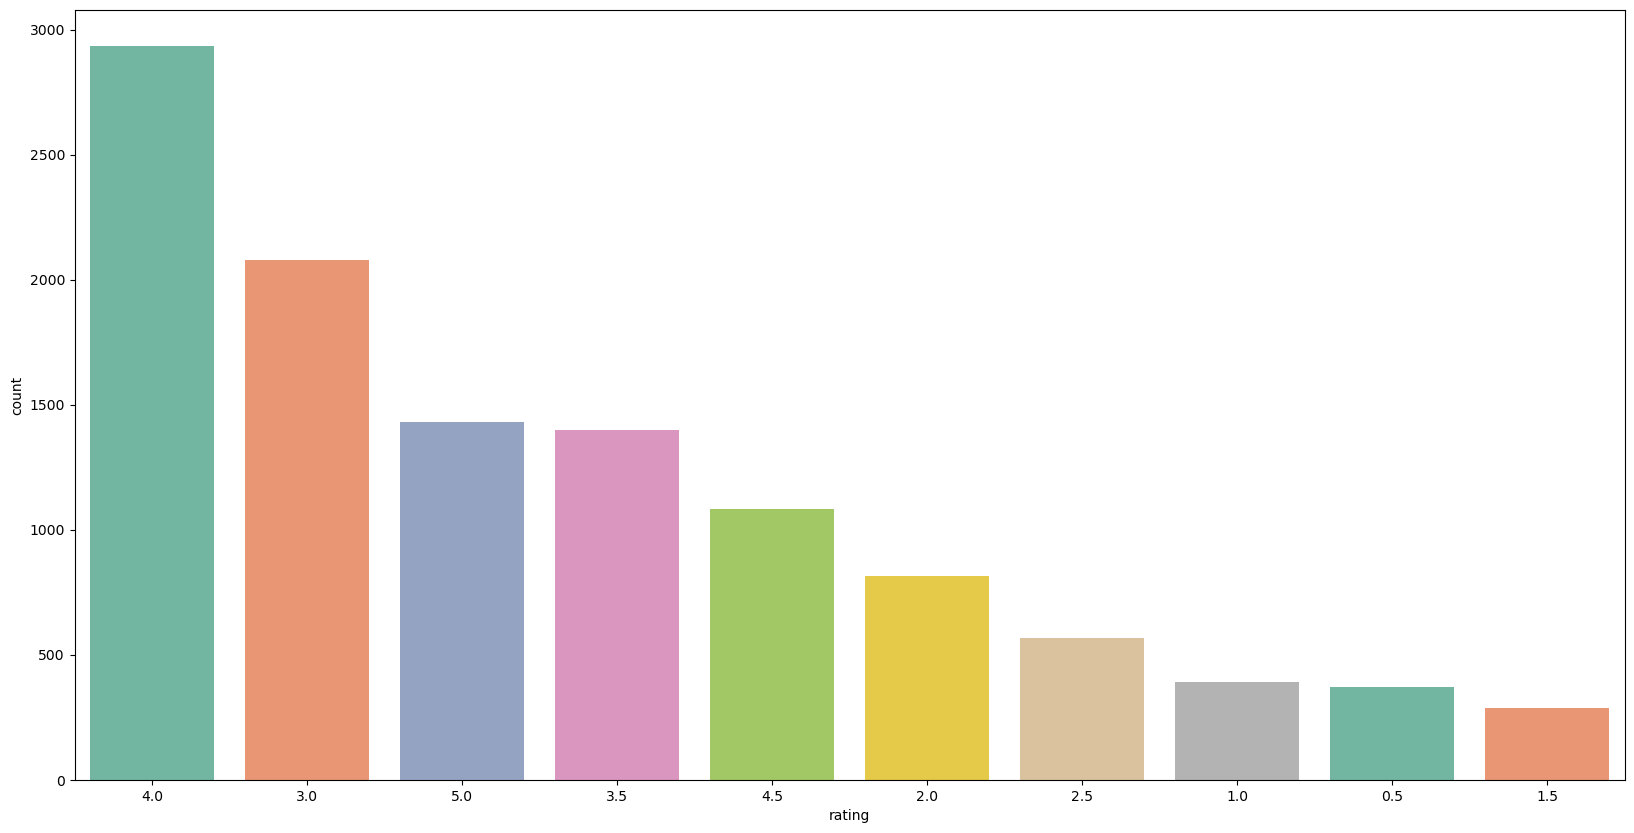

In [7]:
plt.figure(figsize=(20,10))
sns.countplot(x="rating", data= movie_data, palette="Set2", order=movie_data['rating'].value_counts().index[0:20])

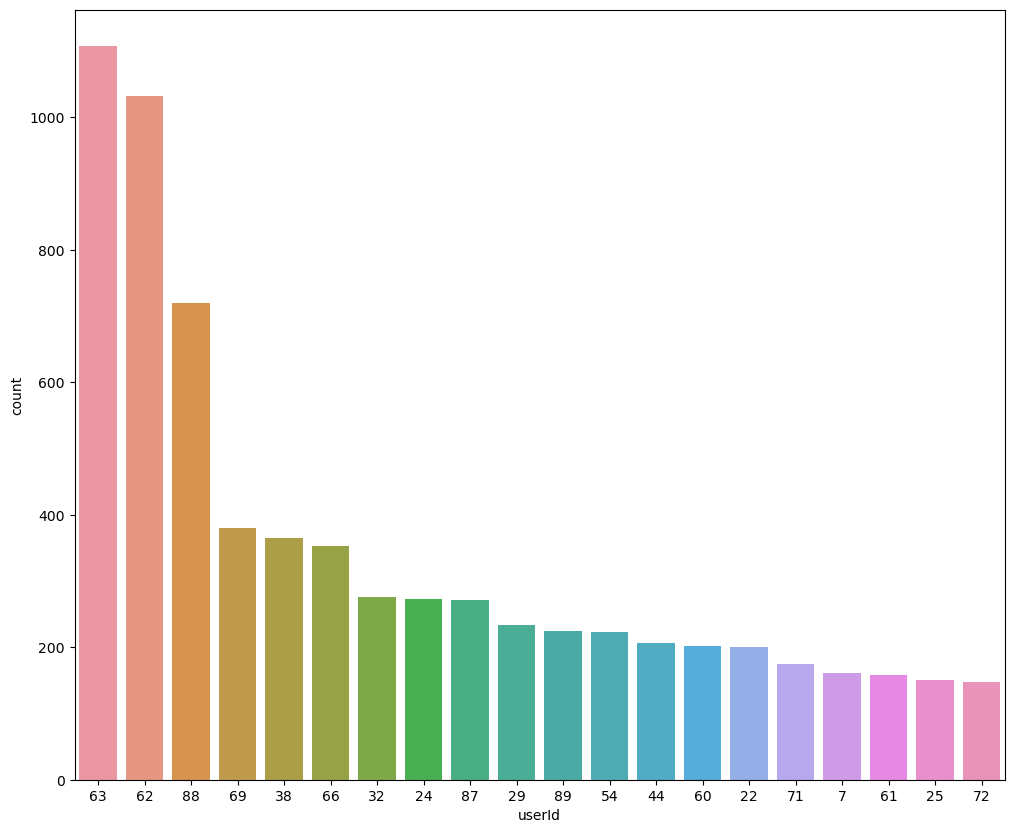

In [8]:
plt.figure(figsize=(12,10))
axis = sns.countplot(x = "userId", data = movie_data, order = movie_data['userId'].value_counts().index[0:20])

## collaborative filtering

## First, import the necessary library.
## Analyse each film's average rating and arrange them.
## The third step is to generate a dataframe with the average rating and the total number of ratings for each movie.
## Calculate the correlation between the movie's rating and the similarity metrix.
## Use the correlation between the ratings to create a matrix. Titles and user ratings will be included in the matrix.
## All user ratings for specific ratings and null values will be listed in each column.
## Using the correlation between that movie and other movies, get the rating for a specific movie and retrieve all the movies that are similar to it.
## A list of the movie names and correlation scores will be created.
## Include the rating column to improve the results together with the title and correlation list. Then, rank the results in descending order while specifying how many ratings are necessary for a certain movie to be strongly connected.

In [9]:
movie_data.groupby('title')['rating'].mean().head()

title
'burbs, The (1989)                   2.875000
(500) Days of Summer (2009)          4.333333
*batteries not included (1987)       4.000000
10 Items or Less (2006)              3.500000
10 Things I Hate About You (1999)    3.555556
Name: rating, dtype: float64

In [10]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Shawshank Redemption, The (1994)             43
Star Wars: Episode IV - A New Hope (1977)    42
Pulp Fiction (1994)                          40
Silence of the Lambs, The (1991)             40
Schindler's List (1993)                      39
Name: rating, dtype: int64

In [11]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())

In [12]:
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())

In [13]:
ratings_mean_count.head()

,rating,rating_counts
title,,
"'burbs, The (1989)",2.875000,4
(500) Days of Summer (2009),4.333333,3
*batteries not included (1987),4.000000,2
10 Items or Less (2006),3.500000,1
10 Things I Hate About You (1999),3.555556,9


In [14]:
user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')
user_movie_rating.head()

title,"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),10 Items or Less (2006),10 Things I Hate About You (1999),100 Girls (2000),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Reykjavik (101 Reykjavík) (2000),11:14 (2003),...,Zeitgeist: The Movie (2007),Zero Effect (1998),Zodiac (2007),Zombie Strippers! (2008),Zombieland (2009),Zoolander (2001),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
movieratings = user_movie_rating['Toy Story (1995)']
movieratings.head()

userId
1    NaN
2    5.0
3    NaN
4    NaN
5    4.0
Name: Toy Story (1995), dtype: float64

In [16]:
movies_like = user_movie_rating.corrwith(movieratings)

C:\Users\Sandeep Aggarwal\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Sandeep Aggarwal\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [17]:
corr = pd.DataFrame(movies_like, columns=['Correlation'])
corr.dropna(inplace=True)
corr.head()

,Correlation
title,
"'burbs, The (1989)",-0.755929
*batteries not included (1987),1.000000
10 Things I Hate About You (1999),0.907971
101 Dalmatians (1996),0.520416
101 Dalmatians (One Hundred and One Dalmatians) (1961),-0.866025


In [18]:
corr.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Dunston Checks In (1996),1.0
Judgment Night (1993),1.0
Backdraft (1991),1.0
Bad Santa (2003),1.0
Road Trip (2000),1.0
Juno (2007),1.0
"Frighteners, The (1996)",1.0
"River Runs Through It, A (1992)",1.0
"Chronicles of Riddick, The (2004)",1.0


In [19]:
corr = corr.join(ratings_mean_count['rating_counts'])
corr.head()

,Correlation,rating_counts
title,,
"'burbs, The (1989)",-0.755929,4
*batteries not included (1987),1.000000,2
10 Things I Hate About You (1999),0.907971,9
101 Dalmatians (1996),0.520416,7
101 Dalmatians (One Hundred and One Dalmatians) (1961),-0.866025,4


In [20]:
corr[corr ['rating_counts']>20].sort_values('Correlation', ascending=False).head()

,Correlation,rating_counts
title,,
Toy Story (1995),1.000000,34
Pirates of the Caribbean: The Curse of the Black Pearl (2003),0.851793,22
Ace Ventura: Pet Detective (1994),0.846491,21
Monty Python and the Holy Grail (1975),0.829278,25
Batman Forever (1995),0.768359,21


## Content based filtering

## Create a pairwise cosine similarity score and use it to calculate the cosine similarity matrix.
## Compile a list of the pairwise cosine similarity scores between that specific movie and all other movies.
## Convert it into a list of tuples with the position as the first member and the similarity score as the second.
## Use the similarity scores, or the second element, to sort the aforementioned list of tuples.
## Get the top 10 items on this list in step eight.
## Return the titles that match the top 10 items' indices in step 9.


In [21]:
df_movies = pd.read_csv("movies.csv")
df_movies.head() 

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
#removing stopwords
tf = TfidfVectorizer(stop_words='english')
#Replace NaN with an empty string
df_movies['genres'] = df_movies['genres'].fillna('')
#Construct the required TF-IDF matrix by fitting and transforming the data
tf_matrix = tf.fit_transform(df_movies['genres'])
#Output the shape of tfidf_matrix
tf_matrix.shape

(10329, 23)

In [24]:
from sklearn.metrics.pairwise import linear_kernel
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tf_matrix, tf_matrix)

In [25]:
indices = pd.Series(df_movies.index, index = df_movies['title']).drop_duplicates()

In [26]:
def recommendationsbygenres(title, cosine_sim = cosine_sim):
    idx = indices[title]
     # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
     # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    print(sim_scores)
       # Return the top 10 most similar movies
    return df_movies['title'].iloc[movie_indices]
    

In [27]:
recommendationsbygenres('Toy Story (1995)')

[(1815, 1.0), (2496, 1.0), (2967, 1.0), (3166, 1.0), (3811, 1.0), (6617, 1.0), (6997, 1.0), (7382, 1.0), (7987, 1.0), (9215, 1.0)]


1815                                          Antz (1998)
2496                                   Toy Story 2 (1999)
2967       Adventures of Rocky and Bullwinkle, The (2000)
3166                     Emperor's New Groove, The (2000)
3811                                Monsters, Inc. (2001)
6617    DuckTales: The Movie - Treasure of the Lost La...
6997                                     Wild, The (2006)
7382                               Shrek the Third (2007)
7987                       Tale of Despereaux, The (2008)
9215    Asterix and the Vikings (Astérix et les Viking...
Name: title, dtype: object